In [3]:
import pandas as pd
import numpy as np


C:\Users\sai\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df1= pd.read_csv("F:\data\\wine.csv")
df1.head(5)
df1.shape

(178, 14)

In [6]:
from scipy import stats
df1.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df1['zscores']=stats.zscore(df1['Proline'])
df1['zscores2']=stats.zscore(df1['Color.int'])
df1.shape
df1.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline', 'zscores', 'zscores2'],
      dtype='object')

In [8]:
df1[(df1.zscores2<3)&(df1.zscores2>-3)].shape


(177, 16)

In [9]:
df1=df1[(df1.zscores2<3)&(df1.zscores2>-3)]


In [10]:
df1['Wine'].value_counts().sort_values()

3    47
1    59
2    71
Name: Wine, dtype: int64

In [11]:
df1.drop(['zscores2','zscores'],axis=1,inplace=True)

In [12]:
df1.shape

(177, 14)

In [13]:
df1['Wine'].value_counts()

2    71
1    59
3    47
Name: Wine, dtype: int64

In [14]:
import seaborn as sns


C:\Users\sai\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
df2=minmax.fit_transform(df1)
df3=pd.DataFrame(df2,columns=df1.columns)
df3.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.416428,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.296084,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.420248,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.622732,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.290353,0.455285,0.608059,0.325963


In [16]:
df3['Wine'].value_counts()

0.5    71
0.0    59
1.0    47
Name: Wine, dtype: int64

In [17]:
dict_={0.5:2,0:1,1:3}
df3['Wine']=df3['Wine'].map(dict_)

In [18]:
df3['Wine'].value_counts()

2    71
1    59
3    47
Name: Wine, dtype: int64

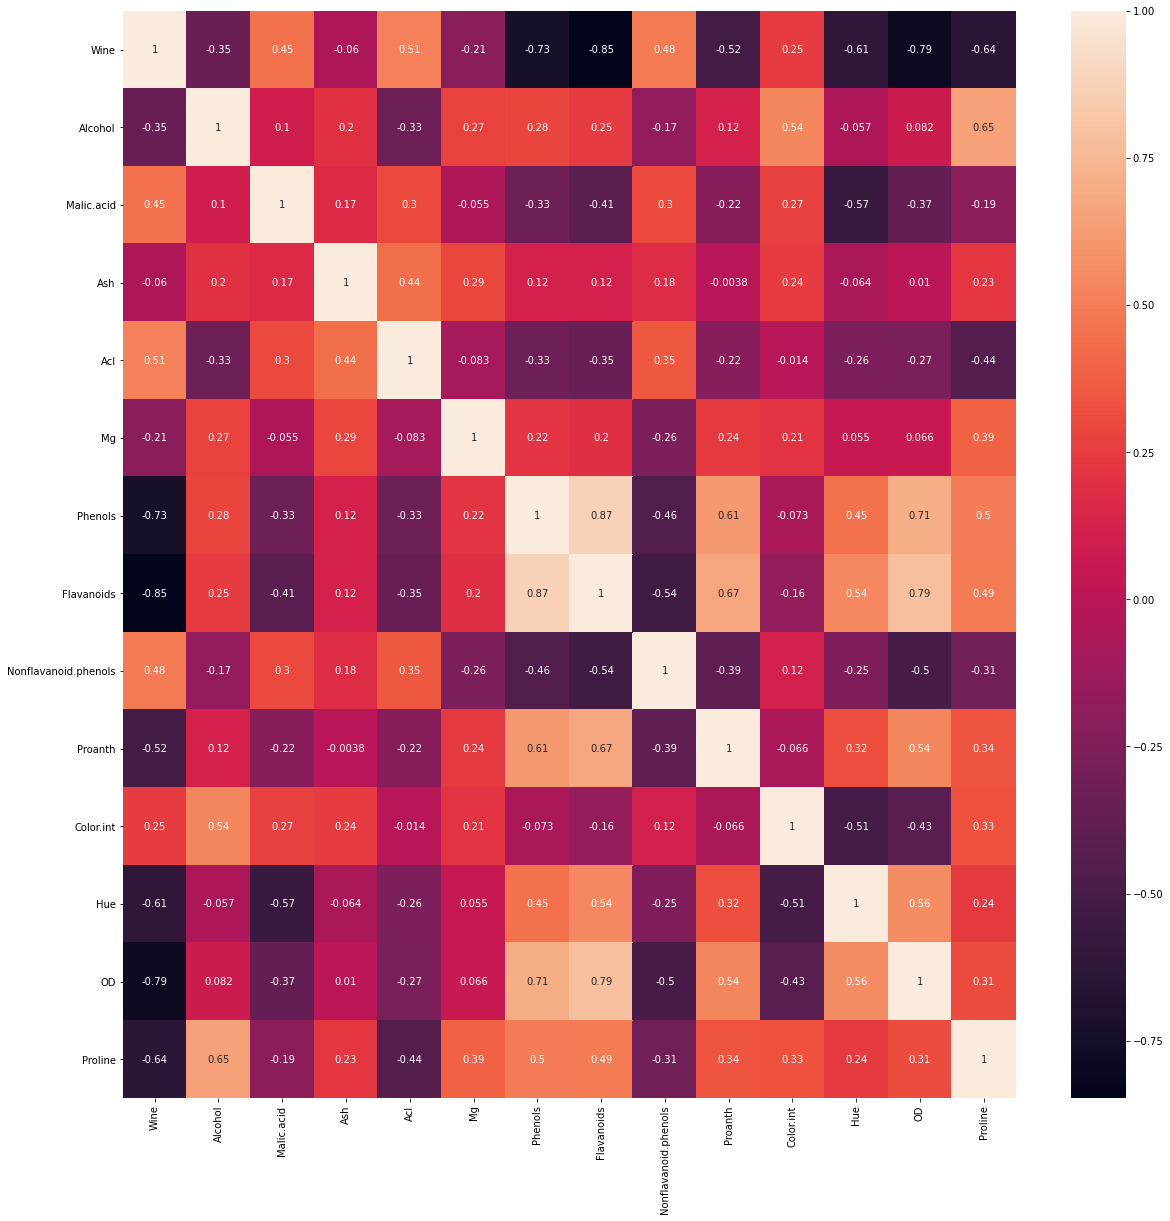

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)


In [20]:
X=df1.drop(['Wine'],axis=1)
y=df1['Wine']

In [21]:
from  sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\sai\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sai\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sai\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [22]:
feature= SelectKBest(score_func=chi2,k=13)
feature_score=feature. fit(X,y)

In [23]:
feature_score

SelectKBest(k=13, score_func=<function chi2 at 0x0000025E1D60A8B8>)

In [24]:
scores=feature_score.scores_

In [25]:
best=pd.DataFrame(scores,columns=['score'])
best

,score
0,5.420428
1,29.032585
2,0.726531
3,28.538565
4,45.008998
5,16.090808
6,63.092173
7,1.760741
8,10.165985
9,103.736884


In [26]:
fea=pd.DataFrame(X.columns,columns=['feature'])

In [27]:
best_score=pd.concat([fea,best],axis=1)

In [28]:
best_score

,feature,score
0,Alcohol,5.420428
1,Malic.acid,29.032585
2,Ash,0.726531
3,Acl,28.538565
4,Mg,45.008998
5,Phenols,16.090808
6,Flavanoids,63.092173
7,Nonflavanoid.phenols,1.760741
8,Proanth,10.165985
9,Color.int,103.736884


In [29]:
best_score.nlargest(13,'score')

,feature,score
12,Proline,16520.281548
9,Color.int,103.736884
6,Flavanoids,63.092173
4,Mg,45.008998
1,Malic.acid,29.032585
3,Acl,28.538565
11,OD,23.223499
5,Phenols,16.090808
8,Proanth,10.165985
0,Alcohol,5.420428


In [30]:
df4=df3.drop(['Hue','Nonflavanoid.phenols','Ash'],axis=1)

In [31]:
df4.head()

,Wine,Alcohol,Malic.acid,Acl,Mg,Phenols,Flavanoids,Proanth,Color.int,OD,Proline
0,1,0.842105,0.191700,0.257732,0.619565,0.627586,0.573840,0.593060,0.416428,0.970696,0.561341
1,1,0.571053,0.205534,0.030928,0.326087,0.575862,0.510549,0.274448,0.296084,0.780220,0.550642
2,1,0.560526,0.320158,0.412371,0.336957,0.627586,0.611814,0.757098,0.420248,0.695971,0.646933
3,1,0.878947,0.239130,0.319588,0.467391,0.989655,0.664557,0.558360,0.622732,0.798535,0.857347
4,1,0.581579,0.365613,0.536082,0.521739,0.627586,0.495781,0.444795,0.290353,0.608059,0.325963


In [32]:
X1=df4.drop(['Wine'],axis=1)
y1=df4.Wine

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.2,random_state=45)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
model.score(X_test,y_test)

C:\Users\sai\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


1.0

In [36]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 1, 2, 2, 3, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 3, 3, 3, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report
mat=confusion_matrix(y_test,y_pred)

In [38]:
mat

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 16]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [40]:
import pickle
file= open('wine.pkl','wb')

pickle.dump(model,file)